In [184]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from itertools import combinations
from scipy.stats import ttest_ind

from pylab import rcParams
booklog = pd.read_csv('log.csv')  #
bookuser = pd.read_csv('users.csv')

In [54]:
booklog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Запись пользователя № - user_919  999 non-null    object 
 1   [2019-01-01 14:06:51              984 non-null    object 
 2   Unnamed: 2                        485 non-null    float64
 3   Unnamed: 3                        138 non-null    float64
dtypes: float64(2), object(2)
memory usage: 31.3+ KB


In [55]:
booklog.columns = ['user_id', 'time', 'bet', 'win']

In [56]:
booklog


,user_id,time,bet,win
0,Запись пользователя № - user_973,[2019-01-01 14:51:16,NaN,NaN
1,Запись пользователя № - user_903,[2019-01-01 16:31:16,NaN,NaN
2,Запись пользователя № - user_954,[2019-01-01 17:17:51,NaN,NaN
3,Запись пользователя № - user_954,[2019-01-01 21:31:18,NaN,NaN
4,Запись пользователя № - user_917,[2019-01-01 23:34:55,156789.0,NaN
...,...,...,...,...
994,Запись пользователя № - user_984,[2019-04-20 9:59:58,9754.0,NaN
995,#error,NaN,10054.0,29265.0
996,#error,NaN,10454.0,NaN
997,#error,NaN,1000.0,NaN


In [57]:
booklog.time.isna().value_counts()

False    984
True      15
Name: time, dtype: int64

<AxesSubplot:>

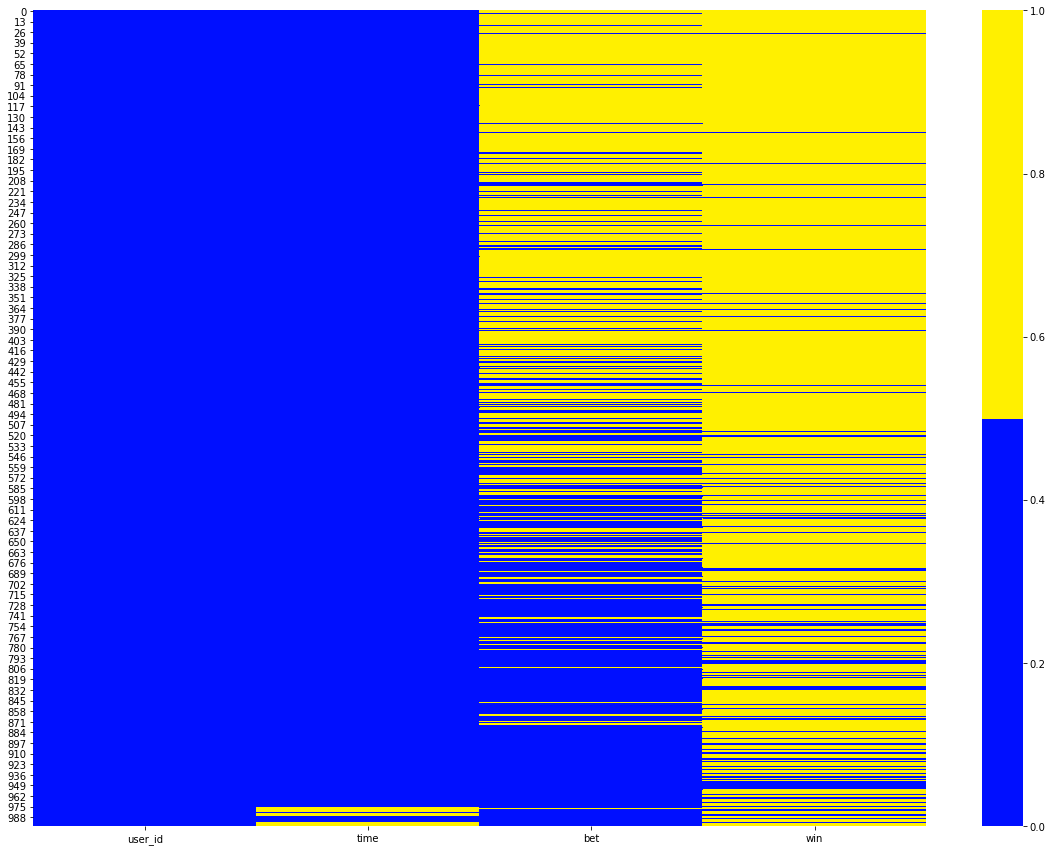

In [58]:
#сразу посмотрим  на пропуски
nulincols = booklog.columns[:]
# желтый - пропущенные данные, синий - не пропущенные
plt.subplots(figsize=(20, 15))
colours = ['#000fff', '#fff000']
sns.heatmap(booklog[nulincols].isnull(), cmap=sns.color_palette(colours))

Удаление пропусков
Пропуски можно удалять автоматически. Во многих случаях это правильно, так как данные с большим количеством пропусков
часто не имеют смысла и не приносят никакой пользы.  

Удалять данные с пропусками можно с помощью метода dropna().

Параметр axis в методе dropna() говорит методу, по какой оси удалять значения.  

Если нужно удалить строки, в которых встречается пропуск (NaN), следует указать axis=0.
Зачем это делать? Например, у нас из 1000 примеров данных про пользователей пропуски есть в пяти.
Разумно их удалить, так как их количество пренебрежимо мало.
Если нужно удалить столбцы, в которых встречается пропуск (NaN), нужно указывать axis=1.
Зачем? Иногда в одном конкретном столбце пропусков настолько много,
что с ними просто не хочется возиться - смысла в них все равно почти нет. 
Еще один интересный параметр - subset. Что он делает? Если передать в него список значений по одной оси
(например, названия столбцов) и задать при этом в параметре axis другую ось (в нашем случае 0),
то мы удалим те строки, для которых в данных столбцах находится пропуск. То же самое работает 
и наоборот: нужно поменять axis на 1 и вместо названий столбцов передавать индексы строк.

Перед удалением строк обязательно сделайте бэкап.
copy_data = data.copy()

In [59]:
booklcopy = booklog.copy()

In [61]:
booklcopy.isna()

,user_id,time,bet,win
0,False,False,True,True
1,False,False,True,True
2,False,False,True,True
3,False,False,True,True
4,False,False,False,True
...,...,...,...,...
994,False,False,False,True
995,False,True,False,False
996,False,True,False,True
997,False,True,False,True


In [62]:
#количество пропусков в столбце time. Метод isna() есть не только у DataFrame,
#но и у Series. Это значит, что применять его можно не только ко всей таблице,
#но и к каждому столбцу отдельно.

booklog['time'].isna().value_counts()

False    984
True      15
Name: time, dtype: int64

In [63]:
#hasnans metod указывает на то, что series нет пропущенных значений

for column in booklcopy.columns[0:2]:
    if booklcopy[column].hasnans:
        booklcopy.drop(column, axis=1, inplace=True)
booklcopy

,user_id,bet,win
0,Запись пользователя № - user_973,NaN,NaN
1,Запись пользователя № - user_903,NaN,NaN
2,Запись пользователя № - user_954,NaN,NaN
3,Запись пользователя № - user_954,NaN,NaN
4,Запись пользователя № - user_917,156789.0,NaN
...,...,...,...
994,Запись пользователя № - user_984,9754.0,NaN
995,#error,10054.0,29265.0
996,#error,10454.0,NaN
997,#error,1000.0,NaN


Удаление пропусков
Пропуски можно удалять автоматически. Во многих случаях это правильно, так как данные с большим количеством пропусков часто не имеют смысла и не приносят никакой пользы.  

Удалять данные с пропусками можно с помощью метода dropna().

Параметр axis в методе dropna() говорит методу, по какой оси удалять значения.  

Если нужно удалить строки, в которых встречается пропуск (NaN), следует указать axis=0.  Зачем это делать? Например, у нас из 1000 примеров данных про пользователей пропуски есть в пяти. Разумно их удалить, так как их количество пренебрежимо мало.
Если нужно удалить столбцы, в которых встречается пропуск (NaN), нужно указывать axis=1. Зачем? Иногда в одном конкретном столбце пропусков настолько много, что с ними просто не хочется возиться - смысла в них все равно почти нет. 
Еще один интересный параметр - subset. Что он делает? Если передать в него список значений по одной оси (например, названия столбцов) и задать при этом в параметре axis другую ось (в нашем случае 0), то мы удалим те строки, для которых в данных столбцах находится пропуск. То же самое работает и наоборот: нужно поменять axis на 1 и вместо названий столбцов передавать индексы строк.

Перед удалением строк обязательно сделайте бэкап.

Удалите все столбцы, где есть пропуски. Запишите в поле, сколько осталось столбцов в данных после этого.

In [64]:
booklcopy = booklog.copy()
booklcopy.dropna(axis='columns')
#1

,user_id
0,Запись пользователя № - user_973
1,Запись пользователя № - user_903
2,Запись пользователя № - user_954
3,Запись пользователя № - user_954
4,Запись пользователя № - user_917
...,...
994,Запись пользователя № - user_984
995,#error
996,#error
997,#error


Удалите все строки, где есть пропуски. Запишите в поле, сколько осталось строк в данных после этого.
133


In [66]:
booklcopy = booklog.copy()
booklcopy.dropna(axis=0)


,user_id,time,bet,win
13,Запись пользователя № - user_917,[2019-01-02 8:57:36,145732.0,1987653.0
28,Запись пользователя № - user_942,[2019-01-04 13:59:42,1678321.0,9876543.0
150,Запись пользователя № - user_982,[2019-01-16 21:54:22,100.0,4749.0
188,Запись пользователя № - user_964,[2019-01-21 18:34:44,200.0,4667.0
204,Запись пользователя № - user_931,[2019-01-22 5:26:59,300.0,4319.0
...,...,...,...,...
966,Запись пользователя № - user_975,[2019-04-19 22:25:15,1000.0,6108.0
970,Запись пользователя № - user_912,[2019-04-20 10:35:49,10554.0,31799.0
971,Запись пользователя № - user_926,[2019-04-20 10:35:50,10354.0,30244.0
975,Запись пользователя № - user_970,[2019-04-20 10:35:54,10354.0,30691.0


In [67]:
booklcopy['time'].dropna()
#(axis='columns')

0      [2019-01-01 14:51:16
1      [2019-01-01 16:31:16
2      [2019-01-01 17:17:51
3      [2019-01-01 21:31:18
4      [2019-01-01 23:34:55
               ...         
990    [2019-04-20 12:55:41
991    [2019-04-20 14:59:36
992    [2019-04-20 17:09:56
993    [2019-04-20 18:10:07
994     [2019-04-20 9:59:58
Name: time, Length: 984, dtype: object

In [68]:
Как удалить простые дубли
В pandas есть метод для удаления дублей (дубликатов) - drop_duplicates(). Он просто удаляет повторяющиеся строки:

import pandas as pd  
df = pd.read_csv('data.csv')
df.drop_duplicates()  
У данного метода тоже есть параметр subset, в этом случае нужно передавать список содержащий названия столбцов. 

SyntaxError: invalid syntax (<ipython-input-68-6524276677e8>, line 1)

Удалите дубли среди столбцов user_id и time. Запишите в поле ниже, сколько осталось строк после удаления дублей.


In [69]:
booklcopy = booklog.copy()

booklcopy.user_id.sort_values()

998                              #error
997                              #error
977                              #error
978                              #error
979                              #error
                     ...               
496    Запись пользователя № - user_999
479    Запись пользователя № - user_999
736    Запись пользователя № - user_999
59     Запись пользователя № - user_999
367    Запись пользователя № - user_999
Name: user_id, Length: 999, dtype: object

In [70]:
booklcopy.drop_duplicates(subset=('time'), inplace=True)
booklcopy.time.sort_values()

0      [2019-01-01 14:51:16
1      [2019-01-01 16:31:16
2      [2019-01-01 17:17:51
3      [2019-01-01 21:31:18
4      [2019-01-01 23:34:55
               ...         
992    [2019-04-20 17:09:56
993    [2019-04-20 18:10:07
969     [2019-04-20 1:18:20
994     [2019-04-20 9:59:58
976                     NaN
Name: time, Length: 984, dtype: object

In [71]:
booklcopy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 994
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  984 non-null    object 
 1   time     983 non-null    object 
 2   bet      472 non-null    float64
 3   win      133 non-null    float64
dtypes: float64(2), object(2)
memory usage: 38.4+ KB


In [72]:
booklcopy = booklog.copy()
booklcopy.drop_duplicates(subset=['user_id','time'], inplace=True) #inplace=True разрешает запись в тот же фрейм


In [73]:
booklcopy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 0 to 994
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  985 non-null    object 
 1   time     984 non-null    object 
 2   bet      472 non-null    float64
 3   win      133 non-null    float64
dtypes: float64(2), object(2)
memory usage: 38.5+ KB


In [74]:
booklcopy.dropna(subset=booklcopy.loc[booklcopy.time.isna() | booklcopy.user_id.isna()].index, axis=1)

,user_id
0,Запись пользователя № - user_973
1,Запись пользователя № - user_903
2,Запись пользователя № - user_954
3,Запись пользователя № - user_954
4,Запись пользователя № - user_917
...,...
990,Запись пользователя № - user_965
991,Запись пользователя № - user_967
992,Запись пользователя № - user_973
993,Запись пользователя № - user_977


In [ ]:
Уберите лишний символ, преобразуйте признак time к datetime. После этого найдите наибольшую дату и выведите ее без времени.

Подсказка: можно применить метод max() к получившемуся столбцу со временем.

Не забудьте избавиться от пропусков.

In [75]:
booklcopy = booklog.copy()
booklcopy.time = booklcopy.time.str.replace('[','')
booklcopy.time = pd.to_datetime(booklcopy['time'])
#booklcopy.hour = booklcopy['time'].dt.hour

In [76]:

#booklcopy.day = booklcopy['time'].dt.day
#pdata[['budget','original_title','profit','genres']].sort_values('profit',ascending=False)
#booklcopy.time.sort_values('date',ascending=False)
booklcopy['time'].dt.date.sort_values(ascending=False)  #!!!

In [119]:

booklcopy.time.max().date()

datetime.date(2019, 4, 20)

In [121]:
booklcopy['time'].dt.date.sort_values(ascending=False).head(1)

994    2019-04-20
Name: time, dtype: object

In [129]:
#Посмотрите на код:
#Какую строчку надо написать вместо пропущенной строки, чтобы получить вывод как на изображении?
#Можно выбрать один или несколько ответов.

#log['time'] = log['time'].apply(lambda x: x.second)
#log['time'] = log['time'].apply(lambda x: x.minutes) error sintax minute
#log.time = log.time.apply(lambda x: x.minute)
#log.time = log.time.apply(lambda x: x.hour)
#log['time'] = log.time.apply(lambda x: x.minute)

log = pd.read_csv("log.csv")  
log = log.dropna()  
log.columns = ['user_id', 'time', 'bet', 'win']  
log['time'] = log['time'].apply(lambda x: x[1:])  
log['time'] = pd.to_datetime(log['time'])  
log['time'] = log.time.apply(lambda x: x.minute)
log['time'].head() 

13     57
28     59
150    54
188    34
204    26
Name: time, dtype: int64

In [ ]:
Извлечение признаков времени
В данном блоке мы будем использовать уже знакомые вам возможности pandas: работу со временем и преобразование столбцов.

Для начала вспомним, что мы можем делать с datetime. Вот примеры атрибутов, по которым мы можем обращаться к данным объектам:

year: возвращает год
month: возвращает месяц
day: возвращает день
hour, minute, second - час, минута, секунда
dayofweek - день недели, от 0 до 6, где 0 - понедельник, 6 - воскресенье
Кроме них, есть и другие интересные атрибуты, советуем посмотреть здесь.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

Ранее в курсе вы разбирали метод apply(). Он позволяет применить определенную функцию к каждому элементу в столбце.

В метод apply() можно передавать обычные и lambda-функции.

Например, если мы хотим получить столбец, в котором каждым значением будет год из другого столбца (это и есть feature engineering - создание новых признаков из старых), мы можем сделать следующее:

year_column = log['time'].apply(lambda x: x.year)  
Библиотека pandas позволяет использовать аксессор dt для упрощения подобной работы:

year_column = log['time'].dt.year
Аксессор - это атрибут столбца, который хранит переменные типа Timestamp, то есть переменные, которые были строковым представлением времени, а затем изменены с помощью pd.to_datetime(). Если вы попытаетесь обратиться к dt у столбца, в котором лежит что-то отличное от времени, вы получите ошибку.

Чуть больше можно увидеть здесь (не забудьте посмотреть в исходный код).
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html

Вы можете пользоваться любым из предложенных выше способов. 

Одним из часто используемых методов в pandas является value_counts().
Если в value_counts() передать значение параметра ascending=True, метод вернет значения, отсортированные по возрастанию.

Этот метод возвращает Series, который содержит количества уникальных элементов.

Например, если мы выполним следующий код:

test = pd.Series([1, 1, 1, 2, 3, 4, 4])  
test.value_counts() 

In [130]:
test = pd.Series([1, 1, 1, 2, 3, 4, 4])  
test.value_counts()

1    3
4    2
3    1
2    1
dtype: int64

Используйте оригинальные данные log.csv, столбец time.

Подсказка: можно использовать value_counts().

Найдите минуту, которая встречалась в данных чаще всего. Введите ответ в поле ниже.

In [132]:
log = pd.read_csv("log.csv")  
log = log.dropna()  
log.columns = ['user_id', 'time', 'bet', 'win']  
log['time'] = log['time'].apply(lambda x: x[1:])  
log['time'] = pd.to_datetime(log['time'])  
log['time'] = log.time.apply(lambda x: x.minute)
log['time'].value_counts().head(1)

36    7
Name: time, dtype: int64

In [ ]:
Используйте оригинальные данные log.csv, столбец time.

Подсказка: можно использовать value_counts().

Найдите месяц, который встречался в данных реже всего. Введите ответ в поле ниже.

In [140]:
log = pd.read_csv("log.csv")  
log = log.dropna()  
log.columns = ['user_id', 'time', 'bet', 'win']  
log['time'] = log['time'].apply(lambda x: x[1:])  
log['time'] = pd.to_datetime(log['time'])
month_column = log['time'].dt.month
#log['time'] = log.time.apply(lambda x: x.month)
month_column.value_counts()

3    57
4    51
2    16
1     9
Name: time, dtype: int64

Используйте оригинальные данные log.csv, столбец time.

Подсказка: можно использовать sum().

Посчитайте, сколько дней в данных являются выходными (то есть субботой или воскресеньем). Введите ответ в поле ниже.

In [169]:
log = pd.read_csv("log.csv")
#log = log.dropna()  
log.columns = ['user_id', 'time', 'bet', 'win']
log.dropna(subset=['time'], inplace=True)
#log= log.time.dropna()
log.time = log.time.str.replace('[','')
log.time = pd.to_datetime(log['time'])

log

#log['time'] = log['time'].apply(lambda x: x[1:])
#log['time'] = pd.to_datetime(log['time'])
dayofweek_column = log['time'].dt.dayofweek
#log['time'] = log.time.apply(lambda x: x.month)
dayofweek_column.value_counts() #0-monday

5    152
2    150
1    149
4    135
0    135
3    132
6    131
Name: time, dtype: int64

Используйте оригинальные данные log.csv, столбец time.

Подсказка: можно использовать value_counts(). Кроме этого, потребуется написать функцию, которая преобразует дату во время дня.

Договоримся, что с 0 до 5 часов - ночь, с 6 до 11 - утро, с 12 до 17 - день, с 18 до 23 - вечер.

Важно: для выполнения задания вам нужно будет избавиться от пропусков только в столбце time. Вспомните, как избавиться от пропусков только по конкретному признаку.

Посчитайте, какое время дня встречается в данных реже всего. Введите ответ в поле ниже: ночь, утро, день или вечер.
Например, ночь.

In [175]:
log = pd.read_csv("log.csv")
#log = log.dropna()  
log.columns = ['user_id', 'time', 'bet', 'win']
log.dropna(subset=['time'], inplace=True)
#log= log.time.dropna()
log.time = log.time.str.replace('[','')
log.time = pd.to_datetime(log['time'])
# Create new column with entries of time of day
# and time provided in timestamp format
timeod = log['time'].dt.time


In [176]:
timeod

0      14:51:16
1      16:31:16
2      17:17:51
3      21:31:18
4      23:34:55
         ...   
990    12:55:41
991    14:59:36
992    17:09:56
993    18:10:07
994    09:59:58
Name: time, Length: 984, dtype: object

In [177]:
log

,user_id,time,bet,win
0,Запись пользователя № - user_973,2019-01-01 14:51:16,NaN,NaN
1,Запись пользователя № - user_903,2019-01-01 16:31:16,NaN,NaN
2,Запись пользователя № - user_954,2019-01-01 17:17:51,NaN,NaN
3,Запись пользователя № - user_954,2019-01-01 21:31:18,NaN,NaN
4,Запись пользователя № - user_917,2019-01-01 23:34:55,156789.0,NaN
...,...,...,...,...
990,Запись пользователя № - user_965,2019-04-20 12:55:41,800.0,6927.0
991,Запись пользователя № - user_967,2019-04-20 14:59:36,10154.0,NaN
992,Запись пользователя № - user_973,2019-04-20 17:09:56,10254.0,NaN
993,Запись пользователя № - user_977,2019-04-20 18:10:07,10354.0,NaN


In [181]:
timeod

0      14:51:16
1      16:31:16
2      17:17:51
3      21:31:18
4      23:34:55
         ...   
990    12:55:41
991    14:59:36
992    17:09:56
993    18:10:07
994    09:59:58
Name: time, Length: 984, dtype: object

In [189]:
#start = datetime.time(0,0,0)
#end = datetime.time(6,0,0)
#timeod.between_time(start, end)
#print "\nResult:\n", 
#https://coderoad.ru/26973393/between_time-%D0%BD%D0%B5-%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%D0%B5%D1%82-%D0%BD%D0%B0-%D0%BF%D0%B0%D0%BD%D0%B5%D0%BB%D0%B8-pandas
timenight = timeod.between_time('00:00:00','05:59:00')


TypeError: Index must be DatetimeIndex

In [ ]:
Задание 5*
1 point possible (graded)
Давайте повторим то, что мы прошли в этой секции. Напишите код, который создаст признак hour из признака time в датасете log.csv. Для этого:

1. загрузите датасет log.csv в переменную log, дальше работать будем с ней;

2. установите имена столбцов: ['user_id', 'time', 'bet', 'win'];

3. избавьтесь от пропусков в log;

4. приведите переменную time к подходящему для извлечения признаков виду;

5. получите значение часа для каждой строки в переменной time и запишите в столбец hour в log.

Результатом будет таблица log со столбцом hour внутри.

In [193]:
log = pd.read_csv("log.csv",header=None)
#log = log.dropna()  
log.columns = ['user_id', 'time', 'bet', 'win']
log.dropna(subset=['time'], inplace=True)
log.time = log.time.str.replace('[','')
log.time = pd.to_datetime(log['time'])
log['hour'] = log['time'].dt.hour

In [194]:
log


,user_id,time,bet,win,hour
0,Запись пользователя № - user_973,2019-01-01 14:51:16,NaN,NaN,14
1,Запись пользователя № - user_903,2019-01-01 16:31:16,NaN,NaN,16
2,Запись пользователя № - user_954,2019-01-01 17:17:51,NaN,NaN,17
3,Запись пользователя № - user_954,2019-01-01 21:31:18,NaN,NaN,21
4,Запись пользователя № - user_917,2019-01-01 23:34:55,156789.0,NaN,23
...,...,...,...,...,...
990,Запись пользователя № - user_965,2019-04-20 12:55:41,800.0,6927.0,12
991,Запись пользователя № - user_967,2019-04-20 14:59:36,10154.0,NaN,14
992,Запись пользователя № - user_973,2019-04-20 17:09:56,10254.0,NaN,17
993,Запись пользователя № - user_977,2019-04-20 18:10:07,10354.0,NaN,18


In [ ]:
Чтобы заполнить пропуски в столбце каким-то значением, можно использовать метод fillna() у самого столбца. Аргументом этого метода будет число, которое появится на месте пропусков.

Например:

log['bet'].fillna(0)  

In [197]:
log = pd.read_csv("log.csv",header=None)
#log = log.dropna()  
log.columns = ['user_id', 'time', 'bet', 'win']
#log.dropna(subset=['time'], inplace=True)
#log.time = log.time.str.replace('[','')
#log.time = pd.to_datetime(log['time'])
log['bet'].fillna(0, inplace=True)
print(log.bet.value_counts(dropna=False))

0.0          515
500.0         50
100.0         48
300.0         42
800.0         42
200.0         40
400.0         40
700.0         38
600.0         37
1000.0        37
900.0         30
9754.0        10
10554.0       10
10154.0        7
10254.0        7
10454.0        6
9954.0         6
10754.0        5
10654.0        5
10354.0        4
10054.0        4
9854.0         2
5000.0         1
27000.0        1
9876.0         1
156789.0       1
12945.0        1
12548.0        1
145732.0       1
1678321.0      1
98753.0        1
123981.0       1
104540.0       1
8700.0         1
950.0          1
8734.0         1
7650.0         1
Name: bet, dtype: int64


In [ ]:
Предположим, что если в признаке win находится пропуск, то выигрыша не было. Здесь два возможных случая:

Человек не делал ставки и ничего не выиграл. То есть просто пришел, посмотрел и ушел.
Человек делал ставку, но не выиграл. Значит, выигрыш на самом деле является отрицательным значением - это проигрыш.
Предлагаем вам написать метод, который заполнит пропуски в признаке win в соответствии с предположением выше. 

Для этого можно применить метод apply() ко всей таблице и передать ему функцию, которая вычисляет размер выигрыша (или проигрыша) по следующей схеме:

Если значение в столбце win существует (не пропуск) - вернуть это же значение. Это значит, что человек выиграл.
Если вместо значения в столбце win и в столбце bet пропуски, вернуть 0.
Если в столбце bet нет пропуска, а в столбце win есть пропуск, вернуть отрицательное значение столбца bet (проигрыш).
на выходе получится таблица без пропусков в столбце win. Следующим шагом будет замена старого столбца win на новый.

Выглядеть это будет примерно так:

def fillna_win(row):  
    # Нужно дописать  
  
# Применяем функцию  
new_win = log.apply(lambda row: fillna_win(row), axis=1)  
  
# Заменяем старый столбец с пропусками на новый без пропусков  
log['win'] = new_win['win'] 

In [209]:
log = pd.read_csv("log.csv",header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['bet'].fillna(0, inplace=True)
log['win'].fillna(0, inplace=True)  #log['win']=log['win'].fillna(0)
def fillna_win(row):
    if row.win == 0: #exam 1
        if row.bet == 0:
            row.win = 0
        else:
                row.win = 0.1 #(-row.bet), но 0,1 каки оригинальное число для последуюшего подсчета результата
    return row.win

# example 2    
#   if pd.isna(row.win)==False:
#       return row.win
#   elif pd.isna(row.win)==True and pd.isna(row.bet)==True:
#       return row.win == 0
#   elif pd.isna(row.win)==True and pd.isna(row.bet)==False:
#       row.win = -(row.bet)
#       return row.win
# Применяем функцию 
new_win = log.apply(lambda row: fillna_win(row), axis=1) 
# Заменяем старый столбец с пропусками на новый без пропусков 
log.win = new_win
print(log.win.value_counts(dropna=False))

0.0        515
0.1        347
6108.0       2
4733.0       2
3834.0       1
          ... 
29719.0      1
5950.0       1
5387.0       1
5450.0       1
5629.0       1
Name: win, Length: 138, dtype: int64


Используйте оригинальный датасет log.csv.
Проделайте с ним действия из задания 1, расположенного выше на этой странице, и из пункта "Заполнение с помощью функции".

Результат запишите числом в поле ниже.

Подсказка: можно использовать sum().

Посчитайте, сколько раз участники ставок проиграли деньги.
То есть посчитайте количество строк, для которых в столбце win находится отрицательное значение.

Что еще можно сделать
В прошлой секции мы обратились к предобработке пропусков и поработали над признаками bet и win.

Теперь мы создадим новый признак на их основе и будем с ним работать.

Напомним, что добавить новый столбец (признак) в pandas очень просто: нужно обратиться к нему по имени и присвоить значение.

log['net'] = # здесь должен быть код, создающий новый признак  
Кроме этого, в pandas (как и в numpy) столбцы можно складывать друг с другом поэлементно.

Задание 1
1 point possible (graded)
Используйте модифицированный в прошлой секции датасет log.csv. Результат запишите числом в поле ниже.

Подсказка: можно использовать sum().
Создайте признак net, хранящий сумму выигрыша с учетом ставки. Для этого используйте следующий алгоритм:
- если значение признака win меньше 0 - присвоить значение признака win признаку net;

- во всех остальных случаях - из значения признака win вычтите значение признака bet и полученное значение присвойте признаку net.

После этого посчитайте, у скольких людей выигрыш положительный.
Например, 0.

In [235]:
log = pd.read_csv("log.csv",header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['bet'].fillna(0, inplace=True)
log['win'].fillna(0, inplace=True)  #log['win']=log['win'].fillna(0)
def fillna_win(row):
    if row.win == 0: #exam 1
        if row.bet == 0:
            row.win = 0
        else:
                row.win = -row.bet
    return row.win
new_win = log.apply(lambda row: fillna_win(row), axis=1) 
log.win = new_win
#print(log.win.value_counts(dropna=False))
#log['hour'] = log['time'].dt.hour
log['net'] = log['win'] - log['bet']

#log.net = log.net.apply(lambda x: log.loc['win'] if x < 0 else x ) #
#https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7
#https://www.analyticsvidhya.com/blog/2020/03/what-are-lambda-functions-in-python/

(log.net>0).sum()

138

In [ ]:
Задание 2
1 point possible (graded)
Используйте датасет log.csv, получившийся в результате выполнения предыдущего задания. Посчитайте среднее значение выигрыша (из столбца net) в тех случаях, когда выигрыш больше 0. Результат округлите до целого, отбросив дробную часть.

Подсказка: можно использовать mean().

In [239]:
round(log.net.loc[log.net > 0].mean(),0)

80253.0

In [ ]:
Задание 3
1 point possible (graded)
Используйте датасет log.csv, получившийся в результате выполнения первого задания этого блока. 
Посчитайте медианное значение выигрыша (из столбца net) в тех случаях, когда выигрыш больше 0.
Результат округлите до целого, отбросив дробную часть.

Подсказка: можно использовать median().

In [240]:
round(log.net.loc[log.net > 0].median(),0)

5347.0

In [ ]:
Как можно посчитать среднее значение для столбца bet, не учитывая при подсчете пропуски?

In [241]:
log.bet.mean()

3291.083

In [242]:
log.bet.mean(skipna=False) # тут пропуски учитывают

3291.083

In [244]:
log.bet.sum() / log.bet.dropna().shape[0]

3291.083

In [245]:
np.mean(log.bet)

3291.083

In [246]:
log['bet'].dropna().mean()

3291.083

In [ ]:
Задание 1
1 point possible (graded)
Используйте модифицированный датасет log.csv.

При модификации датасета log.csv, пропущенные значения в столбцах bet и win замените на 0, cоздайте столбец net,
хранящий сумму выигрыша с учетом ставки (для этого из столбца win поэлементно вычтите столбец 
                                         bet и запишите в новый столбец).

Посчитайте, какой процент посещений букмекерской конторы оборачивался ставкой.
Для этого поделите количество ставок (значений больше 0) на общее количество посещений конторы.
Результат округлите до одного знака после запятой.

In [335]:
log = pd.read_csv("log.csv",header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['bet'].fillna(0, inplace=True)
log['win'].fillna(0, inplace=True)  #log['win']=log['win'].fillna(0)
log['net'] = log['win'] - log['bet']

#log.net = log.net.apply(lambda x: log.loc['win'] if x < 0 else x ) #
#https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7
#https://www.analyticsvidhya.com/blog/2020/03/what-are-lambda-functions-in-python/


In [336]:
log

,user_id,time,bet,win,net
0,Запись пользователя № - user_919,[2019-01-01 14:06:51,0.0,0.0,0.0
1,Запись пользователя № - user_973,[2019-01-01 14:51:16,0.0,0.0,0.0
2,Запись пользователя № - user_903,[2019-01-01 16:31:16,0.0,0.0,0.0
3,Запись пользователя № - user_954,[2019-01-01 17:17:51,0.0,0.0,0.0
4,Запись пользователя № - user_954,[2019-01-01 21:31:18,0.0,0.0,0.0
...,...,...,...,...,...
995,Запись пользователя № - user_984,[2019-04-20 9:59:58,9754.0,0.0,-9754.0
996,#error,NaN,10054.0,29265.0,19211.0
997,#error,NaN,10454.0,0.0,-10454.0
998,#error,NaN,1000.0,0.0,-1000.0


In [257]:
#round(((log.bet>0).sum()/(log.bet).count())*100, 1)
round(((log.bet>0).sum()/log.bet.shape[0])*100, 1)

48.5

In [ ]:
Задание 2
1 point possible (graded)
Используйте датасет log.csv, получившийся в результате модификации при выполнении первого задания этого блока.

Посчитайте среднее значение ставки (из столбца bet) в тех случаях, когда ставка была сделана.
Запишите результат, отбросив дробную часть.
Подсказка: можно использовать mean().

In [263]:
round(log.bet.loc[log.bet > 0].mean())

6786

In [265]:
round(log.bet.sum()/(log.bet>0).sum(), 1)

6785.7

In [ ]:
Задание 3
1 point possible (graded)
Используйте датасет log.csv, получившийся в результате модификации при выполнении первого задания этого блока.

Посчитайте средний выигрыш (из столбца net) в тех случаях, когда ставка была сделана.
В ответ запишите полученное число с отброшенной дробной частью.
Пояснение: выигрыш в данном случае означает изменение количества денег и может быть отрицательным.
    В таком случае это проигрыш.

Подсказка: можно использовать mean().

In [267]:
round(log.net.loc[log.net != 0].mean())

20422

In [270]:
round(log.net.sum()/(log.net != 0).sum(), 1)

20421.9

In [ ]:
Задание 4
1 point possible (graded)
Используйте датасет log.csv, получившийся в результате модификации при выполнении первого задания этого блока.

Посчитайте среднее значение потерь при проигрыше (из столбца net).
Результат округлите до целого, отбросив дробную часть.
Пояснение: ответ должен быть дан в виде отрицательного числа.

Подсказка: можно использовать mean().

In [271]:
round(log.net.sum()/(log.net < 0).sum(), 1)


28543.6

In [273]:
log.net.loc[log.net < 0].mean()

-3372.743515850144

In [ ]:
Задание 5
1/1 point (graded)
Посчитайте, какой процент ставок заканчивается выигрышем, а какой - проигрышем. 
Сравните эти значения и ответьте, какое из них больше.

Выберите пункт из списка ниже.
Выигрыш
Проигрыш верно
Примерно одинаково

In [274]:
(log.net < 0).sum()

347

In [275]:
(log.net > 0).sum()

138

In [ ]:
Задание 6*
1 point possible (graded)
Давайте повторим то, что мы прошли в этой секции. Напишите код, который узнает,
чему была равна минимальная ставка и сколько людей сделали такую ставку. Для этого:

1. загрузите датасет log.csv;

2. посчитайте, чему равна минимальная ставка;

3. посчитайте, сколько раз была сделана минимальная ставка,
и запишите результат в переменную min_bet_amount в виде целого числа.

In [290]:
log = pd.read_csv("log.csv",header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['bet'].fillna(0, inplace=True)
log['win'].fillna(0, inplace=True)  #log['win']=log['win'].fillna(0)
#(log.bet.sort_values(ascending=True)>0)
type(log.bet.unique())

numpy.ndarray

In [328]:
min_bet_amount = (log.bet == (log.bet.loc[log.bet > 0]).min()).sum()

In [329]:
min_bet_amount

48

In [ ]:
12.8 Повторение merge/groupby
 Добавить страницу в мои закладки
рис
Что сделали до этого
Теперь мы снова будем использовать log.csv и users.csv вместе.

Повторим часть предобработки, которую мы должны были выполнить ранее:

# Приведем признак user_id к одному формату в обоих датасетах  
us.user_id = us.user_id.apply(lambda x: x.lower())  
# Избавимся от ошибок в user_id  
log = log[log.user_id != '#error']  
log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1])  
Это будет нужно для того, чтобы объединить оба датасета и работать с едиными данными для проведения продвинутого анализа.

In [365]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from itertools import combinations
from scipy.stats import ttest_ind
from pylab import rcParams


log = pd.read_csv("log.csv", header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log.dropna(subset=['time'], inplace=True)
log.time = log.time.str.replace('[', '')
log.time = pd.to_datetime(log['time'])
log['bet'].fillna(0, inplace=True)
log['win'].fillna(0, inplace=True)
log['net'] = log['win'] - log['bet']
us = pd.read_csv('users.csv', sep='\t') #, encoding='koi8_r'

us.columns = ['user_id', 'mail', 'geo']
# Приведем признак user_id к одному формату в обоих датасетах
us.user_id = us.user_id.apply(lambda x: x.lower())
# Избавимся от ошибок в user_id
log = log[log.user_id != '#error']
log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1])


In [ ]:
Merge
Теперь объединим данные с помощью метода pd.merge():

pd.merge(dataframe1, dataframe2, on='feature_name')  
Первые два аргумента - таблицы, которые нужно будет объединить.

Третий аргумент - название признака, по которому будем объединять данные.
Мы уже привели данные к одинаковому виду, и теперь их можно объединить по признаку 'user_id',
чтобы получить полную информацию о пользователе.

In [366]:
# объединить оба датасета
usl = pd.merge(log, us, on='user_id')

In [367]:
type(usl)

pandas.core.frame.DataFrame

In [368]:
usl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 0 to 974
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   user_id  975 non-null    object        
 1   time     975 non-null    datetime64[ns]
 2   bet      975 non-null    float64       
 3   win      975 non-null    float64       
 4   net      975 non-null    float64       
 5   mail     967 non-null    object        
 6   geo      950 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 60.9+ KB


In [ ]:
Groupby
Теперь повторим groupby.

Данный метод позволяет сгруппировать данные и применить к ним методы агрегации:

df.groupby('user_id').win.median().median()  
В данном случае мы группируем данные по признаку user_id.

После этого мы в каждой группе выбираем признак win.

Затем мы берем медиану каждой группы по признаку win и на выходе получаем таблицу,
в которой индексом является признак user_id.
В этой таблице единственный столбец - медиана по каждой группе (то есть по каждому пользователю).

Наконец, последний вызов median() дает нам медиану по предыдущему столбцу, то есть возвращает одно число.

In [358]:
usl.groupby('user_id').win.median().median()

0.0

In [ ]:
12.9 Анализ по пользователям

Мы собрали все, что нам нужно, чтобы извлечь какие-то инсайты из данных о пользователях.

pd.merge() нам больше не понадобится, теперь будем пользоваться возможностями groupby.

Задание 1
1 point possible (graded)
Используйте датасет, который получился в результате преобразований,
выполненных в задании 12.8.1 (в том числе, заполнение пропусков). 
Ответ запишите в поле ниже в виде целого числа (отбросьте дробную часть).

Посчитайте медиану баланса по каждому пользователю. Для этого сгруппируйте по пользователям,
возьмите признак net, просуммируйте по каждому пользователю и получите медиану.

In [373]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from itertools import combinations
from scipy.stats import ttest_ind
from pylab import rcParams


log = pd.read_csv("log.csv", header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log.dropna(subset=['time'], inplace=True)
log.time = log.time.str.replace('[', '')
log.time = pd.to_datetime(log['time'])
log['bet'].fillna(0, inplace=True)
log['win'].fillna(0, inplace=True)
log['net'] = log['win'] - log['bet']

us = pd.read_csv('users.csv', sep='\t') #, encoding='koi8_r'
us.columns = ['user_id', 'mail', 'geo']
# Приведем признак user_id к одному формату в обоих датасетах
us.user_id = us.user_id.apply(lambda x: x.lower())
# Избавимся от ошибок в user_id
log = log[log.user_id != '#error']
log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1])


# объединить оба датасета
usl = pd.merge(log, us, on='user_id')
usl.groupby('user_id').win.median().unique()     #.median()

array([   0., 5237., 5398.])

5.05

In [376]:
#Посчитайте медиану баланса по каждому пользователю. Для этого сгруппируйте по пользователям,
#возьмите признак net, просуммируйте по каждому пользователю и получите медиану.
usl.groupby('user_id').net.sum().median()

1986.0

In [ ]:
Задание 2*
1/1 point (graded)
Используйте датасет, который получился в результате преобразований,
выполненных в задании 12.8.1 (в том числе, заполнение пропусков).
Ответ запишите в поле ниже в виде целого числа (отбросьте дробную часть).

Сколько раз в среднем каждый человек приходит, не делая ставок, при условии,
что у этого человека все-таки есть хотя бы одна ставка? Например:
    Человек посетил букмекерскую контору 5 раз из них 1 раз сделал ставку,
    4 раза нет - условие выполняется. Человек посетил букмекерскую контору
    5 раз из них ни разу ставку не сделал - условие не выполняется.
    Для того, чтобы узнать это, просуммируйте в каждой группе количество записей со ставкой,
    равной 0, и поделите на общее количество групп.
    Если при этом в группе нет записей со ставкой больше 0,
    считаем количество записей в данной группе равным 0.

In [377]:

# groupby два датафрейма в случае нулевой ставки
gbbet = usl[usl.bet==0].groupby('user_id').bet.count() 
gbbet_null = usl[usl.bet>0].groupby('user_id').bet.count()
# join по user_id
joined=pd.merge(gbbet, gbbet_null, on=['user_id'])
# Оставим только те, в которых есть ставка
joined = joined[joined['bet_y']>0]
# считаем визиты без ставки
joined['bet_x'].sum()/len(joined)

5.05

In [ ]:
Задание 3**
1 point possible (graded)
Используйте датасет, который получился в результате преобразований, выполненных в задании 12.8.1
(в том числе, заполнение пропусков). Ответ запишите в поле ниже в виде целого числа - количества дней.

Сколько в среднем времени проходит между появлением человека в сервисе и первой ставкой?
Считать нужно только тех, кто делал ставку. Для того, чтобы узнать это, напишите метод,
считающий минимальное время среди ставок, равных 0, и минимальное время среди ставок больше 0.
После этого верните разницу между вторым и первым числом. Пройдитесь по всем группам.
Если в группе нет ставок больше 0, пропустите эту группу. Просуммируйте разницу во времени для каждой группы
(с помощью метода, описанного выше) и поделите на количество групп, которые вы не пропустили.

In [ ]:
46

In [ ]:
12.10 Анализ по городам
Задание 1

Используйте датасет, который получился в результате всех преобразований в прошлой секции 
(в том числе, заполнение пропусков).

Ответ запишите в поле ниже в виде одного слова, с большой буквы.

Наибольший суммарный выигрыш среди всех городов имеет Москва.
Посчитайте следующий за ней город. Для этого сгруппируйте по городам,
возьмите признак win, просуммируйте по каждому городу, отсортируйте и получите второй город.

In [378]:
usl.groupby('geo').win.sum().sort_values()

geo
Тюмень                 4701.0
Екатеринбург          36682.0
Ставрополь            46003.0
Краснодар             62718.0
Хабаровск             65459.0
Пермь                 67734.0
Арзангелтск           74375.0
Красноярск            84767.0
Ижевск                84895.0
Ярославль             97441.0
Казань                97806.0
Санкт-Петербург      151007.0
Воронеж              184338.0
Москва             11959741.0
Name: win, dtype: float64

In [ ]:
Задание 2*
1 point possible (graded)
Используйте датасет, который получился в результате всех преобразований в прошлой секции (в том числе, заполнение пропусков).

Подсказки:

1. Можно использовать методы min() и max().

2. Учитывайте, что минимальная ставка, это ставка, которая была сделана, т.е. если ставка равна нулю - значит ставки не было.

3. Ответ запишите в поле ниже в виде целого числа (нужно отбросить дробную часть).

Во сколько раз различаются максимальное и минимальное значение средней ставки по городам?
Для того, чтобы это посчитать, нужно сгруппировать по городам, взять среднее от признака bet,
найти максимальное и минимальное значения, затем поделить одно на другое.

In [400]:
gmax = round(usl[usl.bet>0].groupby('geo').bet.mean().max(),0)

In [401]:
gmin = round(usl[usl.bet>0].groupby('geo').bet.mean().min(),0)

In [403]:
gmax/gmin

127.80492813141684

In [ ]:
Задание 3
1 point possible (graded)
Давайте повторим все, что мы прошли в этой секции. Напишите код, который посчитает, 
сколько раз пользователи приходили в букмекерскую контору в каждом городе. Для этого:

1. загрузите датасеты log.csv и users.csv;

2. удалите user_id с ошибкой (#error) и приведите признак user_id к одному виду в обоих датасетах;

3. слейте два датасета в один по признаку user_id;

4. сгруппируйте данные по правильному признаку (какому - вам нужно понять самим),
    затем выберите user_id и воспользуйтесь функцией count() для подсчета наблюдений в каждой группе;

5. результат запишите в sample2 (объект Series).

In [413]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from itertools import combinations
from scipy.stats import ttest_ind
from pylab import rcParams


log = pd.read_csv("log.csv", header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log.dropna(subset=['time'], inplace=True)
log.time = log.time.str.replace('[', '')
log.time = pd.to_datetime(log['time'])
log['bet'].fillna(0, inplace=True)
log['win'].fillna(0, inplace=True)
log['net'] = log['win'] - log['bet']

us = pd.read_csv('users.csv', sep='\t') #, encoding='koi8_r'
us.columns = ['user_id', 'mail', 'geo']
# Приведем признак user_id к одному формату в обоих датасетах
us.user_id = us.user_id.apply(lambda x: x.lower())
# Избавимся от ошибок в user_id
log = log[log.user_id != '#error']
log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1])
# объединить оба датасета
usl = pd.merge(log, us, on='user_id')
#usl.groupby('user_id').win.median().unique()     #.median()
sample2=usl.groupby('geo').user_id.count()     #.median()
#sns.jointplot(x='win',
#              y='time',
#              hue='geo',
#              kind='kde',
#              data=usl)
type(sample2)

pandas.core.series.Series